<a href="https://colab.research.google.com/github/DylanGraves/DS-Unit-1-Sprint-5-Data-Storytelling-Blog-Post/blob/master/Project1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**What is the purpose of education? A look at the relationship between education, happiness, and suicide throughout the world. Or: Happiness does not prevent suicide.**

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import io

from IPython.display import display

pd.options.display.max_columns = None
pd.options.display.max_rows = 200
pd.set_option('display.max_colwidth', -1)

from google.colab import files

In [63]:
!pip install seaborn --upgrade

Requirement already up-to-date: seaborn in /usr/local/lib/python3.6/dist-packages (0.9.0)


In [33]:
import seaborn as sns
sns.__version__

'0.9.0'

**Looking at the World Happiness Report data**

In [39]:
uploaded = files.upload()

Saving 2017.csv to 2017 (3).csv


In [40]:
hreport = pd.read_csv(io.BytesIO(uploaded['2017.csv']))

print(hreport.shape)

hreport.head()

(155, 12)


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


**Looking at suicide data**

In [6]:
uploaded = files.upload()

Saving suicide.csv to suicide (5).csv


In [7]:
suicide = pd.read_csv(io.BytesIO(uploaded['suicide.csv']))

print(suicide.shape)

suicide.head()

(27820, 12)


,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [8]:
suicide = suicide.drop(['sex', 'age', 'country-year', 'HDI for year', 'generation', 'year', 'suicides/100k pop'], axis=1)

suicide.head()

,country,suicides_no,population,gdp_for_year ($),gdp_per_capita ($)
0,Albania,21,312900,"2,156,624,900",796
1,Albania,16,308000,"2,156,624,900",796
2,Albania,14,289700,"2,156,624,900",796
3,Albania,1,21800,"2,156,624,900",796
4,Albania,9,274300,"2,156,624,900",796


In [9]:
cols = [3, 4]

suicide = suicide.drop(suicide.columns[cols], axis=1)

suicide.head()

,country,suicides_no,population
0,Albania,21,312900
1,Albania,16,308000
2,Albania,14,289700
3,Albania,1,21800
4,Albania,9,274300


In [10]:
suicide = suicide.groupby(['country']).sum(axis=0)

print(suicide.shape)

suicide.head()

(101, 2)


,suicides_no,population
country,,
Albania,1970,62325467
Antigua and Barbuda,11,1990228
Argentina,82219,1035985431
Armenia,1905,77348173
Aruba,101,1259677


In [11]:
suicide = suicide.reset_index()

print(suicide.shape)

suicide.head()

(101, 3)


,country,suicides_no,population
0,Albania,1970,62325467
1,Antigua and Barbuda,11,1990228
2,Argentina,82219,1035985431
3,Armenia,1905,77348173
4,Aruba,101,1259677


In [12]:
suicide['Suicides per 100k'] = suicide['suicides_no'] / (suicide['population'] / 100000)

print(suicide.shape)

suicide.tail()

(101, 4)


,country,suicides_no,population,Suicides per 100k
96,United Arab Emirates,622,36502275,1.704003
97,United Kingdom,136805,1738767780,7.867928
98,United States,1034013,8054027201,12.838459
99,Uruguay,13138,84068943,15.627650
100,Uzbekistan,34803,486422532,7.154891


In [13]:
suicide.head(101)

,country,suicides_no,population,Suicides per 100k
0,Albania,1970,62325467,3.160827
1,Antigua and Barbuda,11,1990228,0.552700
2,Argentina,82219,1035985431,7.936309
3,Armenia,1905,77348173,2.462889
4,Aruba,101,1259677,8.017928
5,Australia,70111,542377786,12.926599
6,Austria,50073,243853094,20.534084
7,Azerbaijan,1656,111790300,1.481345
8,Bahamas,93,6557048,1.418321
9,Bahrain,463,16753926,2.763531


**Merging hreport and suicide dataframes**

In [14]:
suicide = suicide.rename(columns={'country':'Country'})

suicide.head()

,Country,suicides_no,population,Suicides per 100k
0,Albania,1970,62325467,3.160827
1,Antigua and Barbuda,11,1990228,0.552700
2,Argentina,82219,1035985431,7.936309
3,Armenia,1905,77348173,2.462889
4,Aruba,101,1259677,8.017928


In [15]:
df = pd.merge(suicide, hreport, how='left', on='Country')

df.head()

,Country,suicides_no,population,Suicides per 100k,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Albania,1970,62325467,3.160827,109.0,4.644,4.752464,4.535536,0.996193,0.803685,0.731160,0.381499,0.201313,0.039864,1.490442
1,Antigua and Barbuda,11,1990228,0.552700,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Argentina,82219,1035985431,7.936309,24.0,6.599,6.690085,6.507915,1.185295,1.440451,0.695137,0.494519,0.109457,0.059740,2.614005
3,Armenia,1905,77348173,2.462889,121.0,4.376,4.466735,4.285265,0.900597,1.007484,0.637524,0.198303,0.083488,0.026674,1.521499
4,Aruba,101,1259677,8.017928,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df = df.dropna()

df.head()

,Country,suicides_no,population,Suicides per 100k,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Albania,1970,62325467,3.160827,109.0,4.644,4.752464,4.535536,0.996193,0.803685,0.731160,0.381499,0.201313,0.039864,1.490442
2,Argentina,82219,1035985431,7.936309,24.0,6.599,6.690085,6.507915,1.185295,1.440451,0.695137,0.494519,0.109457,0.059740,2.614005
3,Armenia,1905,77348173,2.462889,121.0,4.376,4.466735,4.285265,0.900597,1.007484,0.637524,0.198303,0.083488,0.026674,1.521499
5,Australia,70111,542377786,12.926599,10.0,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211
6,Austria,50073,243853094,20.534084,13.0,7.006,7.070670,6.941330,1.487097,1.459945,0.815328,0.567766,0.316472,0.221060,2.138506


In [17]:
df = df.drop(df.columns[[1,2]], axis=1)

df.head()

,Country,Suicides per 100k,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Albania,3.160827,109.0,4.644,4.752464,4.535536,0.996193,0.803685,0.731160,0.381499,0.201313,0.039864,1.490442
2,Argentina,7.936309,24.0,6.599,6.690085,6.507915,1.185295,1.440451,0.695137,0.494519,0.109457,0.059740,2.614005
3,Armenia,2.462889,121.0,4.376,4.466735,4.285265,0.900597,1.007484,0.637524,0.198303,0.083488,0.026674,1.521499
5,Australia,12.926599,10.0,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211
6,Austria,20.534084,13.0,7.006,7.070670,6.941330,1.487097,1.459945,0.815328,0.567766,0.316472,0.221060,2.138506


In [18]:
df = df.reset_index()

df.head()

,index,Country,Suicides per 100k,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,0,Albania,3.160827,109.0,4.644,4.752464,4.535536,0.996193,0.803685,0.731160,0.381499,0.201313,0.039864,1.490442
1,2,Argentina,7.936309,24.0,6.599,6.690085,6.507915,1.185295,1.440451,0.695137,0.494519,0.109457,0.059740,2.614005
2,3,Armenia,2.462889,121.0,4.376,4.466735,4.285265,0.900597,1.007484,0.637524,0.198303,0.083488,0.026674,1.521499
3,5,Australia,12.926599,10.0,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211
4,6,Austria,20.534084,13.0,7.006,7.070670,6.941330,1.487097,1.459945,0.815328,0.567766,0.316472,0.221060,2.138506


In [19]:
df.shape

(78, 14)

In [20]:
df.head(80)

,index,Country,Suicides per 100k,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,0,Albania,3.160827,109.0,4.644,4.752464,4.535536,0.996193,0.803685,0.731160,0.381499,0.201313,0.039864,1.490442
1,2,Argentina,7.936309,24.0,6.599,6.690085,6.507915,1.185295,1.440451,0.695137,0.494519,0.109457,0.059740,2.614005
2,3,Armenia,2.462889,121.0,4.376,4.466735,4.285265,0.900597,1.007484,0.637524,0.198303,0.083488,0.026674,1.521499
3,5,Australia,12.926599,10.0,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211
4,6,Austria,20.534084,13.0,7.006,7.070670,6.941330,1.487097,1.459945,0.815328,0.567766,0.316472,0.221060,2.138506
5,7,Azerbaijan,1.481345,85.0,5.234,5.299287,5.168714,1.153602,1.152400,0.540776,0.398156,0.045269,0.180988,1.762482
6,9,Bahrain,2.763531,41.0,6.087,6.178989,5.995011,1.488412,1.323110,0.653133,0.536747,0.172668,0.257042,1.656149
7,11,Belarus,30.344685,67.0,5.569,5.646114,5.491885,1.156558,1.444945,0.637714,0.295400,0.155138,0.156314,1.723233
8,12,Belgium,20.692535,17.0,6.891,6.955821,6.826179,1.463781,1.462313,0.818092,0.539771,0.231503,0.251343,2.124210
9,13,Belize,5.533458,50.0,5.956,6.197242,5.714757,0.907975,1.081418,0.450192,0.547509,0.240016,0.096581,2.631956


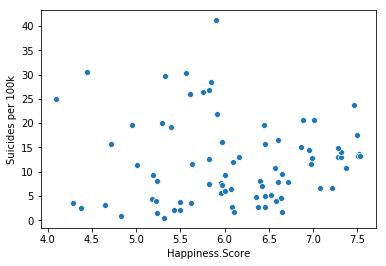

In [24]:
sns.scatterplot(x="Happiness.Score", y="Suicides per 100k", data=df);

# Happier countries have more suicides per capita?

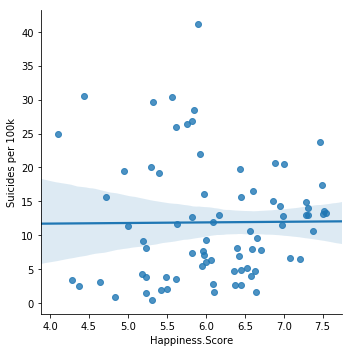

In [25]:
sns.lmplot(x="Happiness.Score", y="Suicides per 100k", data=df);

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 14 columns):
index                            78 non-null int64
Country                          78 non-null object
Suicides per 100k                78 non-null float64
Happiness.Rank                   78 non-null float64
Happiness.Score                  78 non-null float64
Whisker.high                     78 non-null float64
Whisker.low                      78 non-null float64
Economy..GDP.per.Capita.         78 non-null float64
Family                           78 non-null float64
Health..Life.Expectancy.         78 non-null float64
Freedom                          78 non-null float64
Generosity                       78 non-null float64
Trust..Government.Corruption.    78 non-null float64
Dystopia.Residual                78 non-null float64
dtypes: float64(12), int64(1), object(1)
memory usage: 8.6+ KB


In [27]:
suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 4 columns):
Country              101 non-null object
suicides_no          101 non-null int64
population           101 non-null int64
Suicides per 100k    101 non-null float64
dtypes: float64(1), int64(2), object(1)
memory usage: 3.2+ KB


In [28]:
hreport.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 155 entries, 0 to 154
Data columns (total 12 columns):
Country                          155 non-null object
Happiness.Rank                   155 non-null int64
Happiness.Score                  155 non-null float64
Whisker.high                     155 non-null float64
Whisker.low                      155 non-null float64
Economy..GDP.per.Capita.         155 non-null float64
Family                           155 non-null float64
Health..Life.Expectancy.         155 non-null float64
Freedom                          155 non-null float64
Generosity                       155 non-null float64
Trust..Government.Corruption.    155 non-null float64
Dystopia.Residual                155 non-null float64
dtypes: float64(10), int64(1), object(1)
memory usage: 14.6+ KB


In [31]:
hreport.head(160)

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182
5,Netherlands,6,7.377,7.427426,7.326574,1.503945,1.428939,0.810696,0.585384,0.470490,0.282662,2.294804
6,Canada,7,7.316,7.384403,7.247597,1.479204,1.481349,0.834558,0.611101,0.435540,0.287372,2.187264
7,New Zealand,8,7.314,7.379510,7.248490,1.405706,1.548195,0.816760,0.614062,0.500005,0.382817,2.046456
8,Sweden,9,7.284,7.344095,7.223905,1.494387,1.478162,0.830875,0.612924,0.385399,0.384399,2.097538
9,Australia,10,7.284,7.356651,7.211349,1.484415,1.510042,0.843887,0.601607,0.477699,0.301184,2.065211


**Looking at different suicide data**

In [34]:
uploaded = files.upload()

Saving API_SH.STA.SUIC.P5_DS2_en_csv_v2_10517940.csv to API_SH.STA.SUIC.P5_DS2_en_csv_v2_10517940.csv


In [36]:
suicide2 = pd.read_csv(io.BytesIO(uploaded['API_SH.STA.SUIC.P5_DS2_en_csv_v2_10517940.csv']), skiprows=4)

print(suicide2.shape)

suicide2.head()

(264, 64)


,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.7,NaN,NaN,NaN,NaN,6.3,NaN,NaN,NaN,NaN,5.1,NaN,NaN,NaN,NaN,4.8,4.7,NaN,NaN,NaN
2,Angola,AGO,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.9,NaN,NaN,NaN,NaN,7.2,NaN,NaN,NaN,NaN,5.7,NaN,NaN,NaN,NaN,5.0,4.7,NaN,NaN,NaN
3,Albania,ALB,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.5,NaN,NaN,NaN,NaN,6.7,NaN,NaN,NaN,NaN,7.8,NaN,NaN,NaN,NaN,6.0,6.3,NaN,NaN,NaN
4,Andorra,AND,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [37]:
suicide2.tail(300)

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Aruba,ABW,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.700000,NaN,NaN,NaN,NaN,6.300000,NaN,NaN,NaN,NaN,5.100000,NaN,NaN,NaN,NaN,4.800000,4.700000,NaN,NaN,NaN
2,Angola,AGO,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.900000,NaN,NaN,NaN,NaN,7.200000,NaN,NaN,NaN,NaN,5.700000,NaN,NaN,NaN,NaN,5.000000,4.700000,NaN,NaN,NaN
3,Albania,ALB,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.500000,NaN,NaN,NaN,NaN,6.700000,NaN,NaN,NaN,NaN,7.800000,NaN,NaN,NaN,NaN,6.000000,6.300000,NaN,NaN,NaN
4,Andorra,AND,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,Arab World,ARB,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.328195,NaN,NaN,NaN,NaN,4.312462,NaN,NaN,NaN,NaN,4.206429,NaN,NaN,NaN,NaN,4.202179,4.266082,NaN,NaN,NaN
6,United Arab Emirates,ARE,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.200000,NaN,NaN,NaN,NaN,3.100000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,2.800000,2.800000,NaN,NaN,NaN
7,Argentina,ARG,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9.500000,NaN,NaN,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,8.700000,NaN,NaN,NaN,NaN,8.800000,9.200000,NaN,NaN,NaN
8,Armenia,ARM,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.300000,NaN,NaN,NaN,NaN,4.400000,NaN,NaN,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,7.000000,6.600000,NaN,NaN,NaN
9,American Samoa,ASM,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
hreport.head()

,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182


In [45]:
hreport.shape

(155, 12)

In [0]:
suicide2 = suicide2.rename(columns={'Country Name':'Country'})

In [44]:
df2 = pd.merge(hreport, suicide2, how='left', on='Country')

print(df2.shape)

df2.head()

(155, 75)


,Country,Happiness.Rank,Happiness.Score,Whisker.high,Whisker.low,Economy..GDP.per.Capita.,Family,Health..Life.Expectancy.,Freedom,Generosity,Trust..Government.Corruption.,Dystopia.Residual,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,1966,1967,1968,1969,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,Unnamed: 63
0,Norway,1,7.537,7.594445,7.479556,1.616463,1.533524,0.796667,0.635423,0.362012,0.315964,2.277027,NOR,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.3,NaN,NaN,NaN,NaN,12.7,NaN,NaN,NaN,NaN,12.6,NaN,NaN,NaN,NaN,12.4,12.2,NaN,NaN,NaN
1,Denmark,2,7.522,7.581728,7.462272,1.482383,1.551122,0.792566,0.626007,0.355280,0.400770,2.313707,DNK,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.0,NaN,NaN,NaN,NaN,16.2,NaN,NaN,NaN,NaN,12.7,NaN,NaN,NaN,NaN,11.9,12.8,NaN,NaN,NaN
2,Iceland,3,7.504,7.622030,7.385970,1.480633,1.610574,0.833552,0.627163,0.475540,0.153527,2.322715,ISL,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.2,NaN,NaN,NaN,NaN,12.2,NaN,NaN,NaN,NaN,13.3,NaN,NaN,NaN,NaN,14.0,14.0,NaN,NaN,NaN
3,Switzerland,4,7.494,7.561772,7.426227,1.564980,1.516912,0.858131,0.620071,0.290549,0.367007,2.276716,CHE,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,21.8,NaN,NaN,NaN,NaN,20.8,NaN,NaN,NaN,NaN,16.2,NaN,NaN,NaN,NaN,17.1,17.2,NaN,NaN,NaN
4,Finland,5,7.469,7.527542,7.410458,1.443572,1.540247,0.809158,0.617951,0.245483,0.382612,2.430182,FIN,"Suicide mortality rate (per 100,000 population)",SH.STA.SUIC.P5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,24.6,NaN,NaN,NaN,NaN,20.4,NaN,NaN,NaN,NaN,18.9,NaN,NaN,NaN,NaN,14.4,15.9,NaN,NaN,NaN


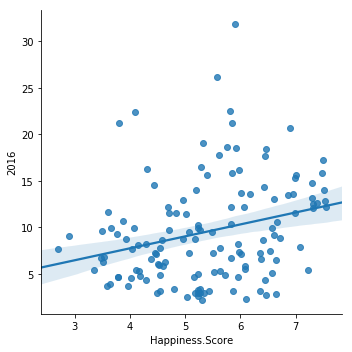

In [46]:
sns.lmplot(x="Happiness.Score", y="2016", data=df2);

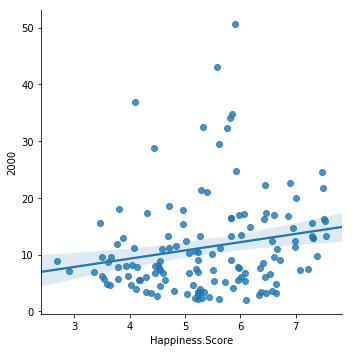

In [48]:
sns.lmplot(x="Happiness.Score", y="2000", data=df2);

**Installing PyDrive, etc.**

In [0]:
!pip install PyDrive

    100% |████████████████████████████████| 993kB 21.4MB/s 
  Stored in directory: /root/.cache/pip/wheels/fa/d2/9a/d3b6b506c2da98289e5d417215ce34b696db856643bad779f4
Successfully built PyDrive


In [0]:
import os
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

**Checking out EdStatsData.csv**

In [0]:
download = drive.CreateFile({'id': '1rgSFJq-VzCuCxcRBk3VG03Icjs0fjfoQ'})
download.GetContentFile('EdStatsData.csv')

In [0]:
df = pd.read_csv('EdStatsData.csv')

print(df.shape)

(886930, 70)


In [0]:
df.tail(100)

,Country Name,Country Code,Indicator Name,Indicator Code,1970,1971,1972,1973,1974,1975,1976,1977,1978,1979,1980,1981,1982,1983,1984,1985,1986,1987,1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2020,2025,2030,2035,2040,2045,2050,2055,2060,2065,2070,2075,2080,2085,2090,2095,2100,Unnamed: 69
886830,Zimbabwe,ZWE,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.80UP.3.MA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,0.02,NaN,NaN,0.03,0.05,0.09,0.14,0.18,0.29,0.48,0.55,0.62,0.67,0.70,0.73,0.76,0.77,0.78,0.79,0.79,NaN
886831,Zimbabwe,ZWE,Wittgenstein Projection: Percentage of the pop...,PRJ.ATT.80UP.3.MF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.01,NaN,NaN,NaN,NaN,0.02,NaN,NaN,0.03,0.03,0.05,0.08,0.10,0.18,0.34,0.44,0.53,0.60,0.66,0.71,0.74,0.77,0.79,0.80,0.80,NaN
886832,Zimbabwe,ZWE,Wittgenstein Projection: Percentage of the tot...,PRJ.ATT.ALL.S1.FE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.09,NaN,NaN,NaN,NaN,0.07,NaN,NaN,0.06,0.05,0.03,0.03,0.02,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
886833,Zimbabwe,ZWE,Wittgenstein Projection: Percentage of the tot...,PRJ.ATT.ALL.S1.MA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.06,NaN,NaN,NaN,NaN,0.05,NaN,NaN,0.03,0.03,0.02,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
886834,Zimbabwe,ZWE,Wittgenstein Projection: Percentage of the tot...,PRJ.ATT.ALL.S1.MF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.07,NaN,NaN,NaN,NaN,0.06,NaN,NaN,0.05,0.04,0.03,0.02,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
886835,Zimbabwe,ZWE,Wittgenstein Projection: Percentage of the tot...,PRJ.ATT.ALL.2.FE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.12,NaN,NaN,NaN,NaN,0.12,NaN,NaN,0.12,0.12,0.12,0.11,0.10,0.09,0.09,0.08,0.07,0.07,0.06,0.05,0.05,0.04,0.04,0.03,0.03,NaN
886836,Zimbabwe,ZWE,Wittgenstein Projection: Percentage of the tot...,PRJ.ATT.ALL.2.MA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.11,NaN,NaN,NaN,NaN,0.11,NaN,NaN,0.10,0.10,0.10,0.09,0.09,0.08,0.08,0.07,0.07,0.06,0.05,0.05,0.04,0.04,0.04,0.03,0.03,NaN
886837,Zimbabwe,ZWE,Wittgenstein Projection: Percentage of the tot...,PRJ.ATT.ALL.2.MF,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.11,NaN,NaN,NaN,NaN,0.11,NaN,NaN,0.11,0.11,0.11,0.10,0.10,0.09,0.08,0.08,0.07,0.06,0.06,0.05,0.05,0.04,0.04,0.03,0.03,NaN
886838,Zimbabwe,ZWE,Wittgenstein Projection: Percentage of the tot...,PRJ.ATT.ALL.NED.FE,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.05,NaN,NaN,NaN,NaN,0.04,NaN,NaN,0.03,0.02,0.01,0.01,0.01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,NaN
886839,Zimbabwe,ZWE,Wittgenstein Projection: Percentage of the tot...,PRJ.ATT.ALL.NED.MA,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.02,NaN,NaN,NaN,NaN

In [0]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 886930 entries, 0 to 886929
Data columns (total 70 columns):
Country Name      886930 non-null object
Country Code      886930 non-null object
Indicator Name    886930 non-null object
Indicator Code    886930 non-null object
1970              72288 non-null float64
1971              35537 non-null float64
1972              35619 non-null float64
1973              35545 non-null float64
1974              35730 non-null float64
1975              87306 non-null float64
1976              37483 non-null float64
1977              37574 non-null float64
1978              37576 non-null float64
1979              36809 non-null float64
1980              89122 non-null float64
1981              38777 non-null float64
1982              37511 non-null float64
1983              38460 non-null float64
1984              38606 non-null float64
1985              90296 non-null float64
1986              39372 non-null float64
1987              38641 non-

**Exploring EdStatsSeries.csv**

In [0]:
uploaded = files.upload()

Saving EdStatsSeries.csv to EdStatsSeries.csv


In [0]:
EdStatsSeries = pd.read_csv(io.BytesIO(uploaded['EdStatsSeries.csv']))

print(EdStatsSeries.shape)

EdStatsSeries.head()

(3665, 21)


,Series Code,Topic,Indicator Name,Short definition,Long definition,Unit of measure,Periodicity,Base Period,Other notes,Aggregation method,Limitations and exceptions,Notes from original source,General comments,Source,Statistical concept and methodology,Development relevance,Related source links,Other web links,Related indicators,License Type,Unnamed: 20
0,BAR.NOED.1519.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,Percentage of female population age 15-19 with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,BAR.NOED.1519.ZS,Attainment,Barro-Lee: Percentage of population age 15-19 with no education,Percentage of population age 15-19 with no education,Percentage of population age 15-19 with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,BAR.NOED.15UP.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 15+ with no education,Percentage of female population age 15+ with no education,Percentage of female population age 15+ with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,BAR.NOED.15UP.ZS,Attainment,Barro-Lee: Percentage of population age 15+ with no education,Percentage of population age 15+ with no education,Percentage of population age 15+ with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,BAR.NOED.2024.FE.ZS,Attainment,Barro-Lee: Percentage of female population age 20-24 with no education,Percentage of female population age 20-24 with no education,Percentage of female population age 20-24 with no education,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Robert J. Barro and Jong-Wha Lee: http://www.barrolee.com/,NaN,NaN,NaN,NaN,NaN,NaN,NaN


**Checking suicide.csv**

In [0]:
uploaded = files.upload()

Saving suicide.csv to suicide.csv


In [0]:
suicide = pd.read_csv(io.BytesIO(uploaded['suicide.csv']))

Suicide data can be somewhat unreliable, with underreporting in some countries, so we must be careful with our analysis.

In [0]:
suicide.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,"2,156,624,900",796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,"2,156,624,900",796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,"2,156,624,900",796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,"2,156,624,900",796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,"2,156,624,900",796,Boomers


In [0]:
suicide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27820 entries, 0 to 27819
Data columns (total 12 columns):
country               27820 non-null object
year                  27820 non-null int64
sex                   27820 non-null object
age                   27820 non-null object
suicides_no           27820 non-null int64
population            27820 non-null int64
suicides/100k pop     27820 non-null float64
country-year          27820 non-null object
HDI for year          8364 non-null float64
 gdp_for_year ($)     27820 non-null object
gdp_per_capita ($)    27820 non-null int64
generation            27820 non-null object
dtypes: float64(2), int64(4), object(6)
memory usage: 2.5+ MB


In [0]:
suicide.shape

(27820, 12)

**Checking EdStatsCountry.csv**

In [0]:
uploaded = files.upload()

Saving EdStatsCountry.csv to EdStatsCountry.csv


In [0]:
EdStatsCountry = pd.read_csv(io.BytesIO(uploaded['EdStatsCountry.csv']))

print(EdStatsCountry.shape)

EdStatsCountry.head()

(241, 32)


,Country Code,Short Name,Table Name,Long Name,2-alpha code,Currency Unit,Special Notes,Region,Income Group,WB-2 code,National accounts base year,National accounts reference year,SNA price valuation,Lending category,Other groups,System of National Accounts,Alternative conversion factor,PPP survey year,Balance of Payments Manual in use,External debt Reporting status,System of trade,Government Accounting concept,IMF data dissemination standard,Latest population census,Latest household survey,Source of most recent Income and expenditure data,Vital registration complete,Latest agricultural census,Latest industrial data,Latest trade data,Latest water withdrawal data,Unnamed: 31
0,ABW,Aruba,Aruba,Aruba,AW,Aruban florin,SNA data for 2000-2011 are updated from official government statistics; 1994-1999 from UN databases. Base year has changed from 1995 to 2000.,Latin America & Caribbean,High income: nonOECD,AW,2000,NaN,Value added at basic prices (VAB),NaN,NaN,Country uses the 1993 System of National Accounts methodology.,NaN,NaN,"IMF Balance of Payments Manual, 6th edition.",NaN,Special trade system,NaN,NaN,2010,NaN,NaN,Yes,NaN,NaN,2012.0,NaN,NaN
1,AFG,Afghanistan,Afghanistan,Islamic State of Afghanistan,AF,Afghan afghani,Fiscal year end: March 20; reporting period for national accounts data: FY (from 2013 are CY). National accounts data are sourced from the IMF and differ from the Central Statistics Organization numbers due to exclusion of the opium economy.,South Asia,Low income,AF,2002/03,NaN,Value added at basic prices (VAB),IDA,HIPC,Country uses the 1993 System of National Accounts methodology.,NaN,NaN,NaN,Actual,General trade system,Consolidated central government,General Data Dissemination System (GDDS),1979,"Multiple Indicator Cluster Survey (MICS), 2010/11","Integrated household survey (IHS), 2008",NaN,2013/14,NaN,2012.0,2000,NaN
2,AGO,Angola,Angola,People's Republic of Angola,AO,Angolan kwanza,"April 2013 database update: Based on IMF data, national accounts data were revised for 2000 onward; the base year changed to 2002.",Sub-Saharan Africa,Upper middle income,AO,2002,NaN,Value added at producer prices (VAP),IBRD,NaN,Country uses the 1993 System of National Accounts methodology.,1991–96,2005,"IMF Balance of Payments Manual, 6th edition.",Actual,Special trade system,Budgetary central government,General Data Dissemination System (GDDS),1970,"Malaria Indicator Survey (MIS), 2011","Integrated household survey (IHS), 2008",NaN,2015,NaN,NaN,2005,NaN
3,ALB,Albania,Albania,Republic of Albania,AL,Albanian lek,NaN,Europe & Central Asia,Upper middle income,AL,Original chained constant price data are rescaled.,1996.0,Value added at basic prices (VAB),IBRD,NaN,Country uses the 1993 System of National Accounts methodology.,NaN,Rolling,"IMF Balance of Payments Manual, 6th edition.",Actual,General trade system,Budgetary central government,General Data Dissemination System (GDDS),2011,"Demographic and Health Survey (DHS), 2008/09","Living Standards Measurement Study Survey (LSMS), 2012",Yes,2012,2010.0,2012.0,2006,NaN
4,AND,Andorra,Andorra,Principality of Andorra,AD,Euro,NaN,Europe & Central Asia,High income: nonOECD,AD,1990,NaN,NaN,NaN,NaN,Country uses the 1968 System of National Accounts methodology.,NaN,NaN,NaN,NaN,Special trade system,NaN,NaN,2011. Population figures compiled from administrative registers.,NaN,NaN,Yes,NaN,NaN,2006.0,NaN,NaN


**Checking EdStatsCountry-Series.csv**

In [0]:
uploaded = files.upload()

Saving EdStatsCountry-Series.csv to EdStatsCountry-Series.csv


In [0]:
EdStatsCountrySeries = pd.read_csv(io.BytesIO(uploaded['EdStatsCountry-Series.csv']))

print(EdStatsCountrySeries.shape)

EdStatsCountrySeries.head()

(613, 4)


,CountryCode,SeriesCode,DESCRIPTION,Unnamed: 3
0,ABW,SP.POP.TOTL,Data sources : United Nations World Population Prospects,NaN
1,ABW,SP.POP.GROW,Data sources: United Nations World Population Prospects,NaN
2,AFG,SP.POP.GROW,Data sources: United Nations World Population Prospects,NaN
3,AFG,NY.GDP.PCAP.PP.CD,Estimates are based on regression.,NaN
4,AFG,SP.POP.TOTL,Data sources : United Nations World Population Prospects,NaN


**Checking EdStatsFootNote.csv**

In [0]:
uploaded = files.upload()

Saving EdStatsFootNote.csv to EdStatsFootNote.csv


In [0]:
EdStatsData = pd.read_csv(io.BytesIO(uploaded['EdStatsData.csv']))

print(EdStatsData.shape)

EdStatsData.head()